## Regression Coefficients are affected by regularisation

As we know, regularisation applies a penalty on the coefficients, in order to reduce their influence and create models that generalise better. This is very good to improve  model performance. However, it masks the true relationship between the predictor X and the outcome Y. Let's explore why.

In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
# load data

data = pd.read_csv('..\precleaned-datasets\dataset_2.csv')
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [3]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [4]:
# lets scale the data first
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [5]:
log = LogisticRegression(C=0.005, max_iter=400, random_state=0)

log.fit(scaler.transform(X_train), y_train)

LogisticRegression(C=0.005, max_iter=400, random_state=0)

In [6]:
log.coef_

array([[ 7.36568042e-03, -1.27081585e-02,  7.17835112e-03,
         1.08703572e-03,  2.58910197e-02, -1.92778648e-02,
        -8.85670132e-03,  9.63888874e-03,  1.99913263e-02,
        -9.41410634e-03,  1.55407512e-02,  2.49631720e-02,
        -3.03236100e-02,  1.77467422e-02, -2.62308646e-02,
         2.05576868e-01,  7.44449870e-03,  2.09146250e-02,
        -7.09801372e-03,  1.51924929e-02,  9.24395412e-02,
         5.53070997e-03, -6.01010436e-02,  1.75710229e-02,
         1.23011021e-02,  5.24454173e-02,  6.92720513e-03,
         9.99852034e-03, -3.16296328e-03, -1.02978199e-01,
         7.49837604e-03, -3.63713235e-02, -4.03422278e-02,
         4.18937369e-02,  5.93911595e-03,  1.68257145e-02,
         1.63845040e-02,  4.20255467e-02,  2.13162253e-02,
         4.38980561e-02, -5.75087873e-03,  3.18002776e-03,
        -1.83806640e-02,  3.07977752e-02,  2.71869834e-03,
         1.08112479e-02, -7.93985660e-03,  1.56263964e-01,
         1.78241835e-02,  1.27954826e-02,  1.04460275e-0

In [7]:
# The numpy module of Python provides a function called numpy. ravel, 
# which is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
log.coef_.ravelel()

array([ 7.36568042e-03, -1.27081585e-02,  7.17835112e-03,  1.08703572e-03,
        2.58910197e-02, -1.92778648e-02, -8.85670132e-03,  9.63888874e-03,
        1.99913263e-02, -9.41410634e-03,  1.55407512e-02,  2.49631720e-02,
       -3.03236100e-02,  1.77467422e-02, -2.62308646e-02,  2.05576868e-01,
        7.44449870e-03,  2.09146250e-02, -7.09801372e-03,  1.51924929e-02,
        9.24395412e-02,  5.53070997e-03, -6.01010436e-02,  1.75710229e-02,
        1.23011021e-02,  5.24454173e-02,  6.92720513e-03,  9.99852034e-03,
       -3.16296328e-03, -1.02978199e-01,  7.49837604e-03, -3.63713235e-02,
       -4.03422278e-02,  4.18937369e-02,  5.93911595e-03,  1.68257145e-02,
        1.63845040e-02,  4.20255467e-02,  2.13162253e-02,  4.38980561e-02,
       -5.75087873e-03,  3.18002776e-03, -1.83806640e-02,  3.07977752e-02,
        2.71869834e-03,  1.08112479e-02, -7.93985660e-03,  1.56263964e-01,
        1.78241835e-02,  1.27954826e-02,  1.04460275e-02,  3.02962970e-02,
        2.73177364e-04,  

In [9]:
pd.Series(log.coef_.ravel())

0      0.007366
1     -0.012708
2      0.007178
3      0.001087
4      0.025891
         ...   
103   -0.000674
104   -0.004172
105   -0.003980
106    0.073018
107   -0.019702
Length: 108, dtype: float64

In [10]:
# we train 4 different models, decreasing the amount
# of regularisation (that is, increasing C)

# here we will store the coefficients of the variables
# fitted for each different model
coefs_df = []

# we train 4 different models with regularization
penalties = [0.00005, 0.0005, 0.005, 0.05, 0.5]

for c in penalties:
    logit = LogisticRegression(penalty='l2', C = c, max_iter=300, random_state=0 )
    logit.fit(scaler.transform(X_train), y_train)
    
    coefs_df.append(pd.Series(logit.coef_.ravel()))

In [11]:
# now I create a dataframe with the coefficients for all
# the variables for the 4 different logistic regression models

len(coefs_df)

5

In [15]:
coefs = pd.DataFrame(coefs_df).T
coefs.columns = penalties
coefs.index = X_train.columns
coefs.head(10)

,0.00005,0.00050,0.00500,0.05000,0.50000
var_1,0.002746,0.005288,0.007366,0.011095,0.011679
var_2,-0.005650,-0.010763,-0.012708,-0.012865,-0.013288
var_3,0.000971,-0.002668,0.007178,0.061188,0.100813
var_4,0.001327,-0.002046,0.001087,0.020369,0.025934
var_5,0.002923,0.008070,0.025891,0.039422,0.042810
var_6,-0.003284,-0.007593,-0.019278,-0.024036,-0.024577
var_7,0.002614,0.001959,-0.008857,-0.027955,-0.032603
var_8,0.001244,0.008202,0.009639,-0.001290,-0.005867
var_9,0.000421,0.009937,0.019991,0.022666,0.023153
var_10,-0.002811,-0.007586,-0.009414,-0.009709,-0.009738


In [16]:
# apply log scale to the penalties (simplifies comparison)

coefs.columns = np.log(penalties)
coefs.head()

,-9.903488,-7.600902,-5.298317,-2.995732,-0.693147
var_1,0.002746,0.005288,0.007366,0.011095,0.011679
var_2,-0.005650,-0.010763,-0.012708,-0.012865,-0.013288
var_3,0.000971,-0.002668,0.007178,0.061188,0.100813
var_4,0.001327,-0.002046,0.001087,0.020369,0.025934
var_5,0.002923,0.008070,0.025891,0.039422,0.042810


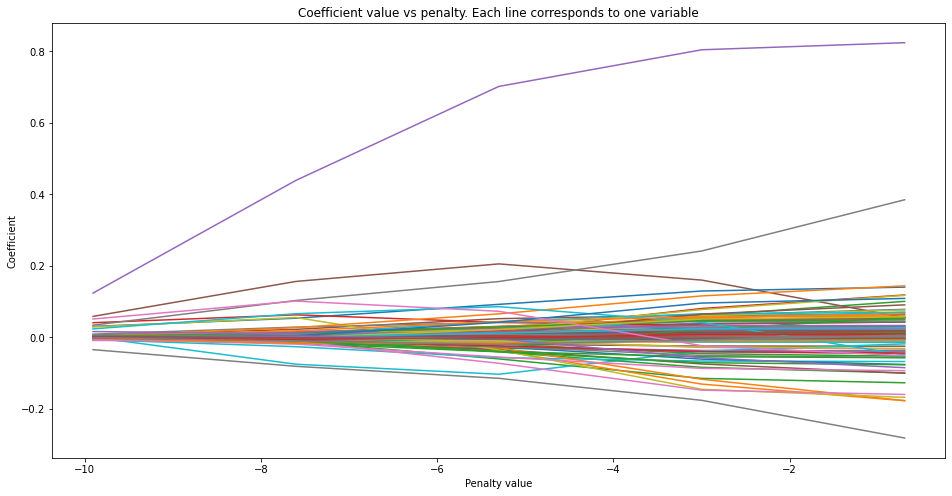

In [20]:
# plot the change in coefficients with the penalty

coefs.T.plot(figsize=(16,8), legend=False)
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty. Each line corresponds to one variable')
plt.show();

Text(0.5, 1.0, 'Coefficient value vs penalty')

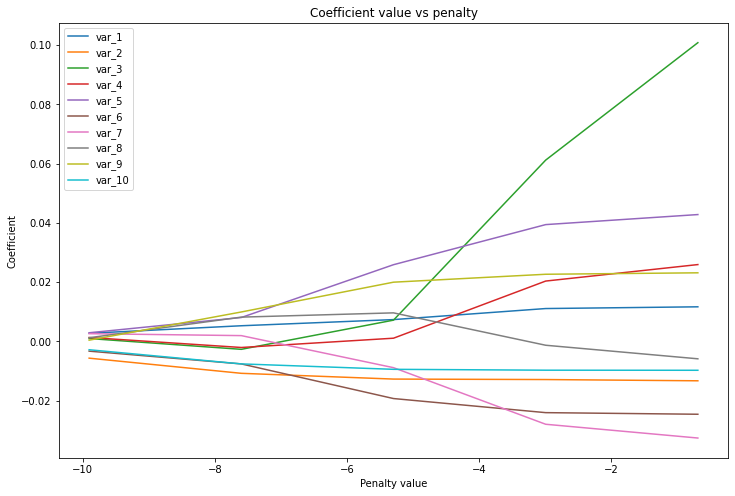

In [21]:
# now I will plot only the first 10 features for better
# visualisation

temp = coefs.head(10)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

We can see that the relation among the coefficients is complex. Some features show bigger coefficients than others without regularisation (on the right side of the plo), but when the penalty increases this relationship changes (can see on the left side of the plot).

Some other features are very important (show big coefficients) without regularisation, but with regularization their importance is similar to that of other features.

While this is not crucial to selet features, this is actually quite important when our aim is to understand the true relationship of a variable with the target. Or in other words, when we need to interpret and fully understand the outcome of the Linear Regression.

Text(0.5, 1.0, 'Coefficient value vs penalty')

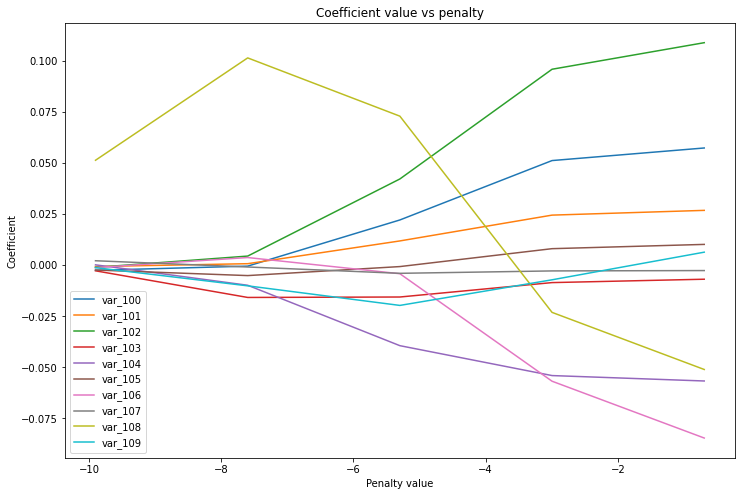

In [22]:
# plot another 10 features for visualisation
temp = coefs.tail(10)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

Same as before, the relationship between features, as inferred from the coefficients, changes depending on the level of regularisation.